In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [237]:
netflix = pd.read_csv('netflix_titles_2021.csv')
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [238]:
print('shape:',netflix.shape)
print('size:',netflix.size)
print('dtypes',netflix.dtypes)

shape: (8807, 12)
size: 105684
dtypes show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [239]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [240]:
missing_valT=netflix.isnull().sum()
missing_valT

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [241]:
missing_valP=(netflix.isnull().sum()/ len(netflix)*100)
missing_valP

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [242]:
missing_values = pd.DataFrame()
missing_values['Total'] = missing_valT
missing_values['Missing percentage'] = missing_valP
missing_values

,Total,Missing percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


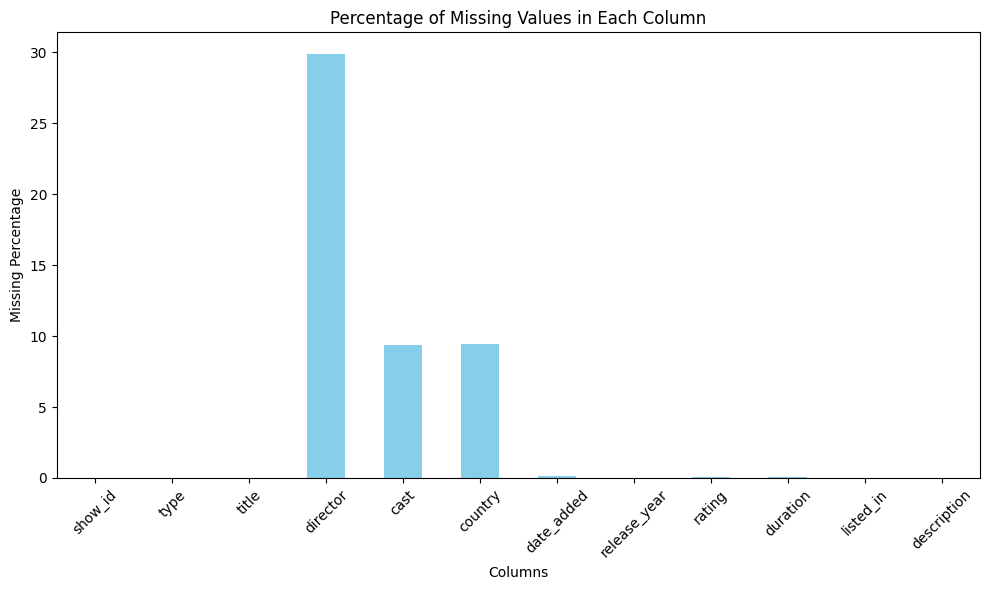

In [243]:
plt.figure(figsize=(10, 6))
missing_values['Missing percentage'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [244]:
netflix2 = netflix.copy()
netflix2 = netflix2.dropna(how='any',subset = ['director','cast'])
netflix2.fillna({'country':'missing','duration':'missing','rating':'missing'},inplace = True)


In [245]:
netflix2.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [246]:
netflix2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [247]:
netflix2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [248]:
netflix2.type.value_counts().to_frame('Value_count')

,Value_count
Movie,5522
TV Show,178


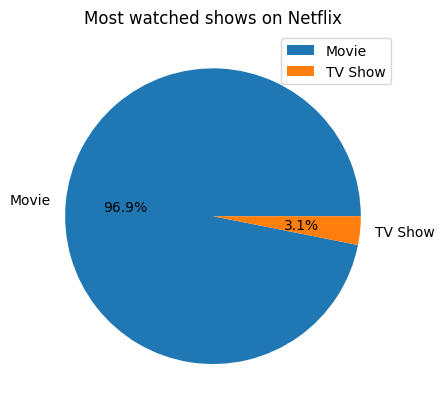

In [249]:
type = ['Movie','TV Show']
value_count = [5522,178]
plt.pie(value_count,labels = type,autopct='%1.1f%%')
plt.title('Most watched shows on Netflix')
plt.legend(type)
plt.show()

In [250]:
netflix2['director'].describe()

count                       5700
unique                      4152
top       Raúl Campos, Jan Suter
freq                          18
Name: director, dtype: object

Text(0, 0.5, 'Number of shows')

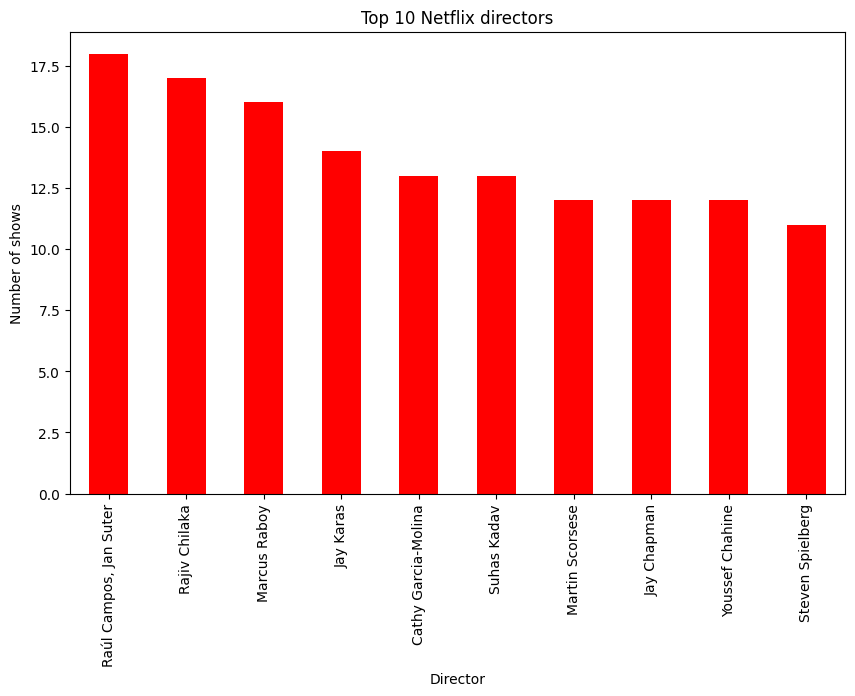

In [251]:
director_counts = netflix2['director'].value_counts()
top_director = director_counts.head(10)
plt.figure(figsize=(10, 6))
top_director.plot(kind='bar',color='r')
plt.title('Top 10 Netflix directors')
plt.xlabel('Director')
plt.ylabel('Number of shows')

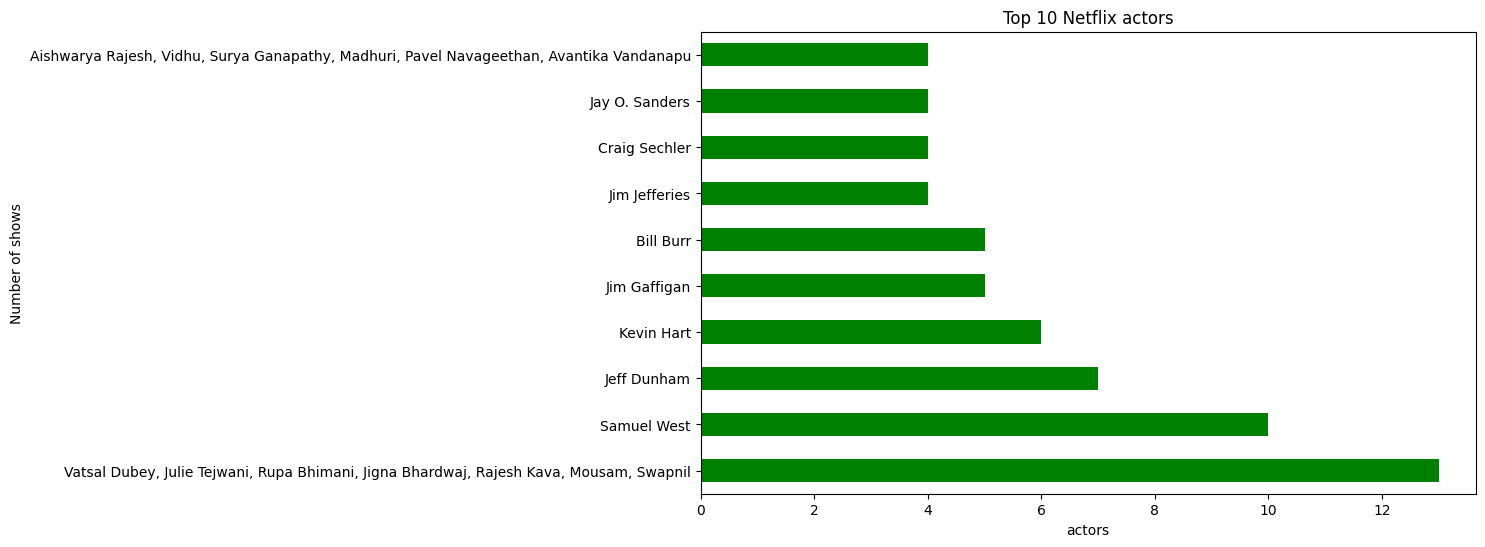

In [252]:
actor_count = netflix2['cast'].value_counts()
top_actor = actor_count.head(10)
plt.figure(figsize=(10, 6))
top_actor.plot(kind='barh',color='g')
plt.title('Top 10 Netflix actors')
plt.xlabel('actors')
plt.ylabel('Number of shows')

plt.show()

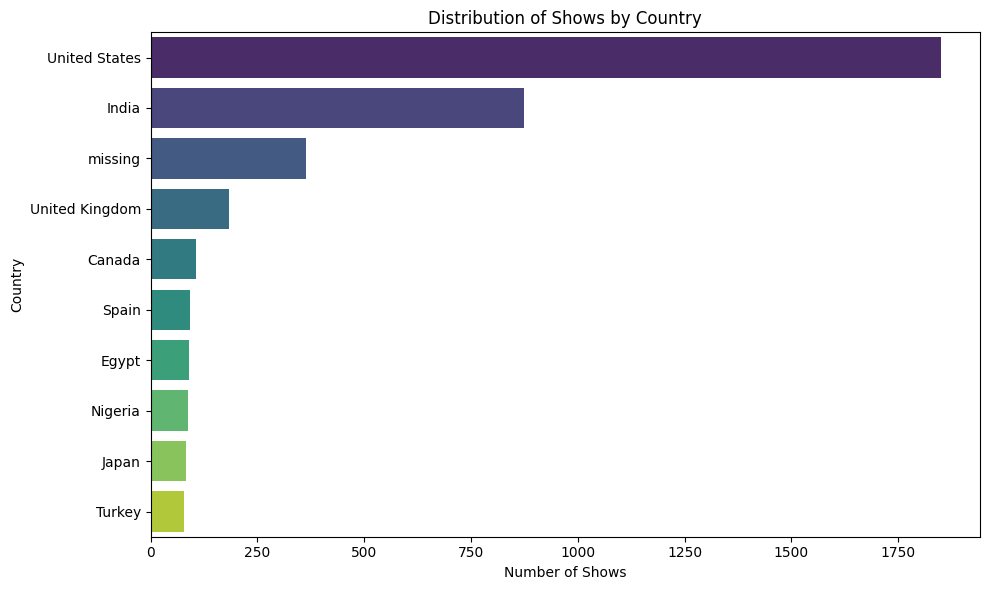

In [253]:
country_counts = netflix2['country'].value_counts().head(10)  

country_counts = country_counts.reset_index()

country_counts.columns = ['Country', 'Number of Shows']


plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Shows', y='Country', data=country_counts, palette='viridis')
plt.title('Distribution of Shows by Country')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


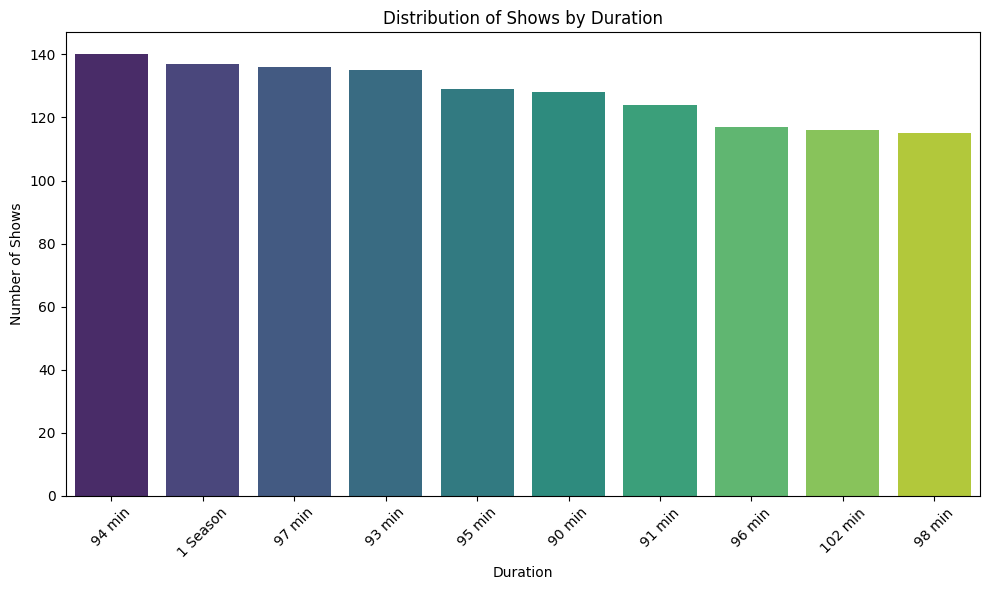

In [254]:
show_duration = netflix2['duration'].value_counts().head(10)

show_duration = show_duration.reset_index()

show_duration.columns = ['Duration', 'Number of Shows']

plt.figure(figsize=(10, 6))
sns.barplot(x='Duration', y='Number of Shows', data=show_duration, palette='viridis')
plt.title('Distribution of Shows by Duration')
plt.xlabel('Duration')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [255]:
netflix2.duplicated().sum()

0

In [256]:
new_genre = netflix2['listed_in'].str.split(",",2)
new_genre

/var/folders/fj/_pbd8nw171d7sx8h499n9r6w0000gn/T/ipykernel_36170/377029728.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  new_genre = netflix2['listed_in'].str.split(",",2)


2       [Crime TV Shows,  International TV Shows,  TV ...
5                  [TV Dramas,  TV Horror,  TV Mysteries]
6                              [Children & Family Movies]
7       [Dramas,  Independent Movies,  International M...
8                         [British TV Shows,  Reality TV]
                              ...                        
8801          [Dramas,  International Movies,  Thrillers]
8802                   [Cult Movies,  Dramas,  Thrillers]
8804                           [Comedies,  Horror Movies]
8805                [Children & Family Movies,  Comedies]
8806    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 5700, dtype: object

In [257]:
netflix2['Genre 1'] = new_genre.str.get(0)
netflix2['Genre 2'] = new_genre.str.get(1)
netflix2['Genre 3'] = new_genre.str.get(2)
netflix2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,TV Dramas,TV Horror,TV Mysteries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Dramas,Independent Movies,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,British TV Shows,Reality TV,NaN


In [258]:
netflix2.drop('listed_in',inplace=True,axis=1)
netflix2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,TV Dramas,TV Horror,TV Mysteries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,"September 24, 2021",2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",Dramas,Independent Movies,International Movies
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,British TV Shows,Reality TV,NaN


In [261]:
netflix2['Genre 1'].describe()


count       5700
unique        33
top       Dramas
freq        1586
Name: Genre 1, dtype: object

In [262]:
netflix2['Genre 2'].describe()


count                      4485
unique                       35
top        International Movies
freq                       1545
Name: Genre 2, dtype: object

In [264]:
netflix2['Genre 3'].describe()

count                      2434
unique                       29
top        International Movies
freq                        881
Name: Genre 3, dtype: object

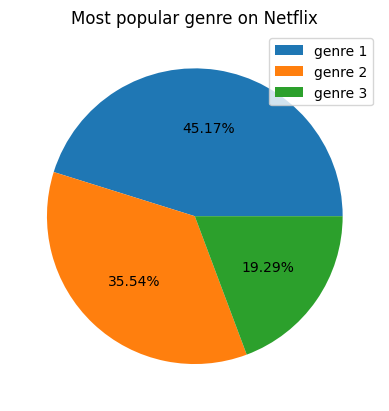

In [274]:
genres = ['genre 1','genre 2','genre 3']
count = [5700,4485,2434]
plt.pie(count,autopct="%2.2f%%")
plt.title('Most popular genre on Netflix')
plt.legend(genres)
plt.show()

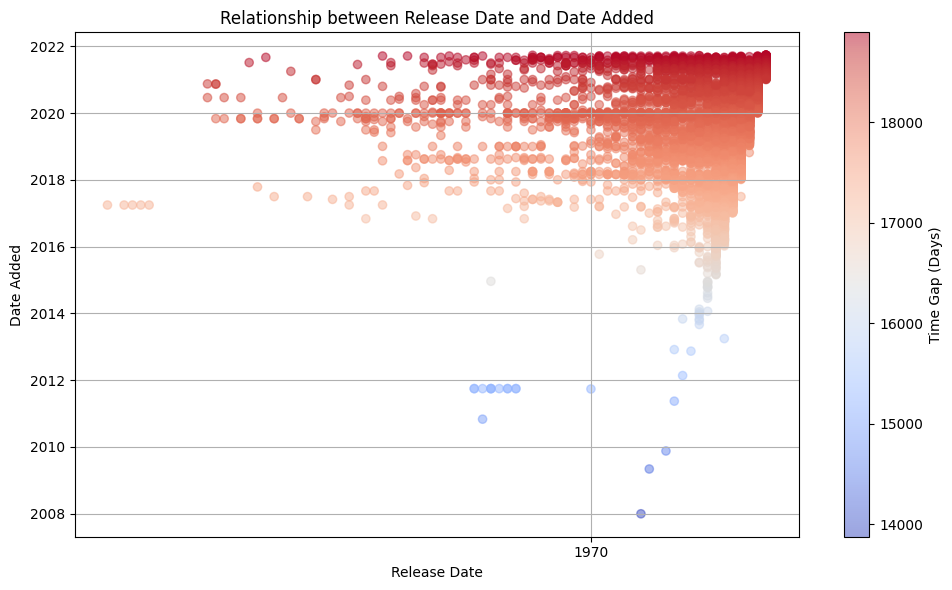

In [282]:
netflix2['date_added'] = pd.to_datetime(netflix2['date_added'])
netflix2['release_year'] = pd.to_datetime(netflix2['release_year'])

netflix2['time_gap'] = (netflix2['date_added'] - netflix2['release_year']).dt.days

plt.figure(figsize=(10, 6))
plt.scatter(x=netflix2['release_year'], y=netflix2['date_added'], c=netflix2['time_gap'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Time Gap (Days)')
plt.title('Relationship between Release Date and Date Added')
plt.xlabel('Release Date')
plt.ylabel('Date Added')
plt.grid(True)
plt.tight_layout()
plt.show()


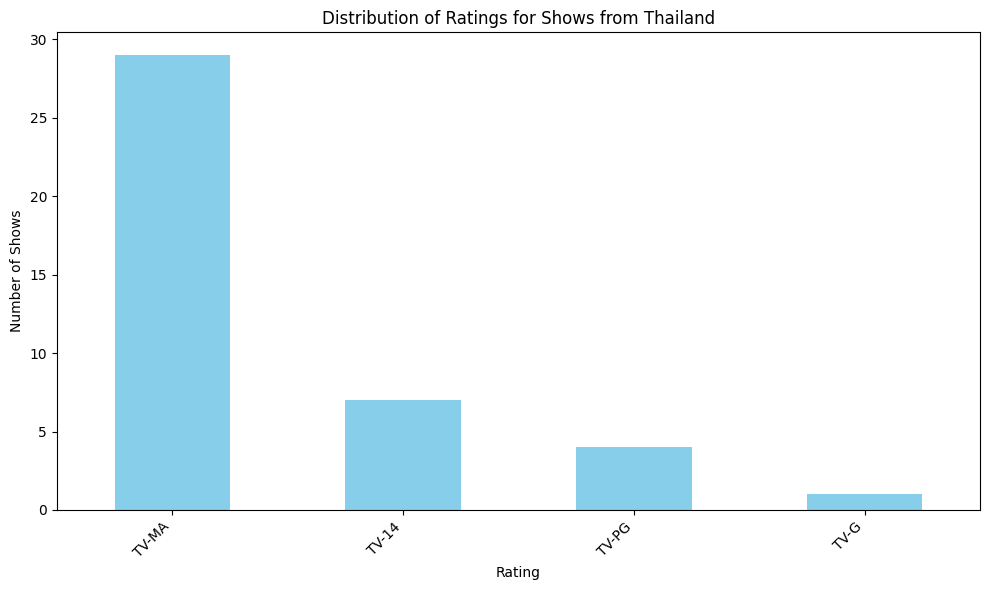

In [309]:
thailand_shows = netflix2[netflix2['country'] == 'Thailand']

rating_counts = thailand_shows['rating'].value_counts()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings for Shows from Thailand')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()
